In [1]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec, FastText
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

### Importowanie danych

In [2]:
train_x = pd.read_fwf('data/train_text.txt', header=None)
train_y = pd.read_fwf('data/train_label.txt', header=None)
test_x = pd.read_fwf('data/test_text.txt', header=None)
test_y = pd.read_fwf('data/test_label.txt', header=None)

In [3]:
train_x[0] = train_x[0].astype(str) + train_x[1].fillna('').astype(str)
train_x = train_x.drop(columns=[1])
train_x.columns = ['text']

In [4]:
test_x[0] = test_x[0].astype(str) + test_x[1].fillna('').astype(str)
test_x = test_x.drop(columns=[1])
test_x.columns = ['text']

In [5]:
train_y.columns = ['labels']
test_y.columns = ['labels']

### Word2vec - demo

In [10]:
sentences = train_x.values[:10,0].tolist()

for i in range(len(sentences)):
    sentences[i] = sentences[i].split()
    
print(sentences)

[['Dla', 'mnie', 'faworytem', 'do', 'tytułu', 'będzie', 'Cracovia.', 'Zobaczymy,', 'czy', 'typ', 'się', 'sprawdzi.'], ['Brawo', 'ty', 'Daria', 'kibic', 'ma', 'być', 'na', 'dobre', 'i', 'złe'], ['Super,', 'polski', 'premier', 'składa', 'kwiaty', 'na', 'grobach', 'kolaborantów.', 'Ale', 'doczekaliśmy', 'czasów.'], ['Musi.', 'Innej', 'drogi', 'nie', 'mamy.'], ['Odrzut', 'natychmiastowy,', 'kwaśna', 'mina,', 'mam', 'problem'], ['Jaki', 'on', 'był', 'fajny', 'xdd', 'pamiętam,', 'że', 'spóźniłam', 'się', 'na', 'jego', 'pierwsze', 'zajęcia', 'i', 'to', 'sporo', 'i', 'za', 'karę', 'kazał', 'mi', 'usiąść', 'w', 'pierwszej', 'ławceXD'], ['No', 'nie', 'ma', 'u', 'nas', 'szczęścia', '😉'], ['Dawno', 'kogoś', 'tak', 'wrednego', 'nie', 'widziałam', 'xd'], ['Zaległości', 'były,', 'ale', 'ważne', 'czy', 'były', 'wezwania', 'do', 'zapłaty', 'z', 'których', 'się', 'klub', 'nie', 'wywiązał.'], ['Gdzie', 'jest', '.', 'Brudziński', 'jesteś', 'kłamcą', 'i', 'marnym', 'kutasem']]


In [11]:
model = Word2Vec(sentences=sentences, vector_size=5, min_count=1)

print(model)

Word2Vec<vocab=94, vector_size=5, alpha=0.025>


In [12]:
# access vector for one word
print('Vector of word "problem"', model.wv['problem'], '\n')

#list the vocabulary words
words = list(model.wv.key_to_index)
print(words)

#list 10 most similar words
model.wv.most_similar('problem', topn=10)

Vector of word "problem" [-0.00820446 -0.16737898 -0.11200025  0.14209077  0.06705079] 

['i', 'nie', 'na', 'się', 'do', 'czy', 'ma', 'kutasem', 'drogi', 'kolaborantów.', 'Ale', 'doczekaliśmy', 'czasów.', 'Musi.', 'Innej', 'mamy.', 'kwiaty', 'Odrzut', 'natychmiastowy,', 'kwaśna', 'mina,', 'mam', 'problem', 'Jaki', 'on', 'grobach', 'Super,', 'składa', 'premier', 'mnie', 'faworytem', 'tytułu', 'będzie', 'Cracovia.', 'Zobaczymy,', 'typ', 'sprawdzi.', 'Brawo', 'ty', 'Daria', 'kibic', 'być', 'dobre', 'złe', 'marnym', 'polski', 'był', 'fajny', 'xdd', 'zapłaty', 'wrednego', 'widziałam', 'xd', 'Zaległości', 'były,', 'ale', 'ważne', 'były', 'wezwania', 'z', 'pamiętam,', 'których', 'klub', 'wywiązał.', 'Gdzie', 'jest', '.', 'Brudziński', 'jesteś', 'kłamcą', 'tak', 'kogoś', 'Dawno', '😉', 'że', 'spóźniłam', 'jego', 'pierwsze', 'zajęcia', 'to', 'sporo', 'za', 'karę', 'kazał', 'mi', 'usiąść', 'w', 'pierwszej', 'ławceXD', 'No', 'u', 'nas', 'szczęścia', 'Dla']


[('ławceXD', 0.9424886703491211),
 ('były', 0.8348297476768494),
 ('kwaśna', 0.7805994749069214),
 ('ważne', 0.778577983379364),
 ('typ', 0.6595696806907654),
 ('że', 0.6328960061073303),
 ('faworytem', 0.6037698984146118),
 ('.', 0.5910349488258362),
 ('Zobaczymy,', 0.5386906266212463),
 ('premier', 0.5101023316383362)]

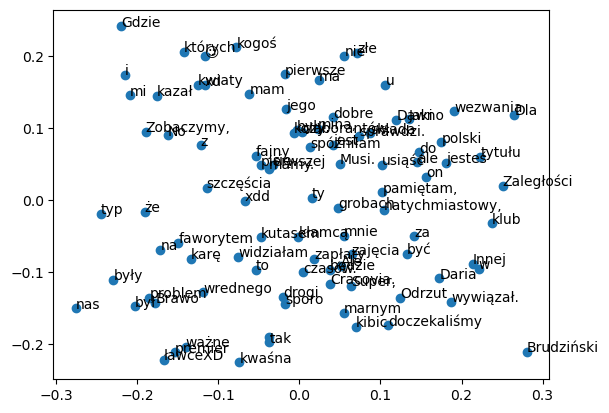

In [14]:
X = model.wv.vectors
pca = PCA(n_components=2)

result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

### TODO

- Wiele wyrazów przy tokenizacji ma kropki i przecinki
- Dwie dobre strony z jakimś wstępem do w2v
https://builtin.com/machine-learning/nlp-word2vec-python
https://radimrehurek.com/gensim/models/word2vec.html
-